In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\PlayStoreApps-ParticipantsData\train.csv")
test_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\PlayStoreApps-ParticipantsData\test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [4]:
np.sum(train_data.isnull())

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64

In [5]:
train_data.shape

(16516, 11)

In [6]:
train_data.dtypes

Offered_By              object
Category                object
Rating                 float64
Reviews                  int64
Size                    object
Price                   object
Content_Rating          object
Last_Updated_On         object
Release_Version         object
OS_Version_Required     object
Downloads               object
dtype: object

In [7]:
train_data.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [8]:
test_data['Downloads']=-999

In [9]:
concat=pd.concat([train_data,test_data])

In [10]:
concat.shape

(41292, 11)

In [11]:
test_data.shape

(24776, 11)

In [12]:
24776+16516

41292

In [13]:
concat.tail()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
24771,ps_id-30176,Shopping,3.74,38,21M,Free,Everyone,Feb 16 2020,2.4.20,4.1 and up,-999
24772,ps_id-5357,Auto And Vehicles,4.80,4,4.5M,Free,Everyone,Jan 02 2019,1.3,5.0 and up,-999
24773,ps_id-1920,Education,4.78,499,1.1M,Free,Everyone,Feb 16 2018,1.1,4.0.3 and up,-999
24774,ps_id-6655,Game Puzzle,4.61,328050,72M,Free,Everyone,May 02 2020,2.5.3,4.1 and up,-999
24775,ps_id-3916,Finance,3.98,1467,18M,Free,Everyone,Apr 30 2020,2.25.2,4.4 and up,-999


In [14]:
train_data['Downloads'].unique()

array(['100,000+', '5,000+', '10,000+', '10,000,000+', '50,000+',
       '1,000,000+', '5,000,000+', '500,000+', '1,000+', '1,000,000,000+',
       '50,000,000+', '100+', '100,000,000+', '500+', '10+', '50+',
       '500,000,000+', '5,000,000,000+'], dtype=object)

In [15]:
concat['Downloads'].unique()

array(['100,000+', '5,000+', '10,000+', '10,000,000+', '50,000+',
       '1,000,000+', '5,000,000+', '500,000+', '1,000+', '1,000,000,000+',
       '50,000,000+', '100+', '100,000,000+', '500+', '10+', '50+',
       '500,000,000+', '5,000,000,000+', -999], dtype=object)

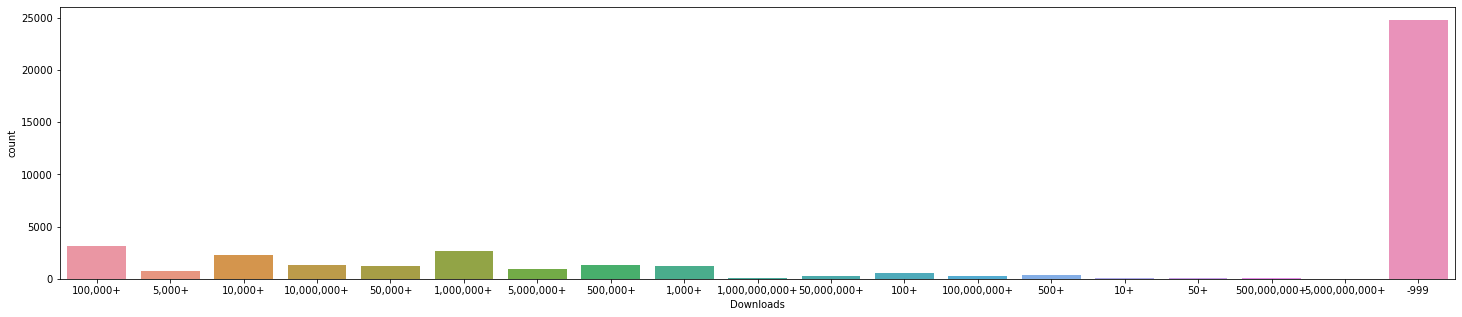

In [16]:
plt.figure(figsize=(25,5))
sns.countplot(data=concat,x='Downloads')


In [17]:
concat['Price']=concat['Price'].replace({'Free':'0'})

In [18]:
concat['Price']=concat['Price'].astype('float')

In [19]:
concat['Last_Updated_On'].value_counts()

May 06 2020    1089
May 05 2020     859
May 01 2020     673
May 02 2020     632
Apr 30 2020     563
               ... 
Nov 12 2014       1
Feb 10 2015       1
May 27 2014       1
Dec 13 2013       1
Mar 10 2015       1
Name: Last_Updated_On, Length: 2012, dtype: int64

In [20]:
#concat['Month']=concat['Last_Updated_On'].str.split(" ",expand=True)[0] or
concat['Month']=concat['Last_Updated_On'].str.split(" ").str[0]
concat['Year']=concat['Last_Updated_On'].str.split(" ").str[2]
concat['Year']=concat['Year'].astype('int')

In [21]:
concat.drop(['Last_Updated_On'],axis=1,inplace=True)

In [22]:
#use regular expression to drop + symbol
concat['ID']=concat['Offered_By'].str.extract('(\d+)')
concat['ID']=concat['ID'].astype('int')
concat.drop(['Offered_By'],axis=1,inplace=True)

In [23]:
concat.head()

,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Month,Year,ID
0,Finance,4.18,1481,Varies with device,0.0000,Everyone,Varies with device,Varies with device,"100,000+",May,2020,24654
1,Music And Audio,4.81,302,10M,0.0000,Everyone,3.9.18,4.1 and up,"5,000+",Mar,2020,35329
2,Game Casual,4.27,374,27M,0.0000,Everyone,1.10.1,4.1 and up,"10,000+",May,2020,11044
3,Business,4.03,122058,Varies with device,0.0000,Teen,Varies with device,Varies with device,"10,000,000+",May,2020,36068
4,Medical,4.60,358,Varies with device,297.5742,Everyone,Varies with device,Varies with device,"5,000+",Nov,2018,35831


In [24]:
#list of object data
str_features=(np.where(concat.dtypes==object)[0])

In [25]:
str_features

array([0, 3, 5, 6, 7, 8, 9], dtype=int64)

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
lis=list(concat.columns[st r_features])

In [28]:
lis

['Category',
 'Size',
 'Content_Rating',
 'Release_Version',
 'OS_Version_Required',
 'Downloads',
 'Month']

In [29]:
lis.remove('Downloads')

In [30]:
lis

['Category',
 'Size',
 'Content_Rating',
 'Release_Version',
 'OS_Version_Required',
 'Month']

In [31]:
for i in lis:
    concat[i]=encoder.fit_transform(concat[i].astype('str'))
    encoder=LabelEncoder()

In [32]:

concat.head()

,Category,Rating,Reviews,Size,Price,Content_Rating,Release_Version,OS_Version_Required,Downloads,Month,Year,ID
0,12,4.18,1481,702,0.0000,1,8031,36,"100,000+",8,2020,24654
1,38,4.81,302,37,0.0000,1,5406,21,"5,000+",7,2020,35329
2,21,4.27,374,175,0.0000,1,979,21,"10,000+",8,2020,11044
3,4,4.03,122058,702,0.0000,4,8031,36,"10,000,000+",8,2020,36068
4,37,4.60,358,702,297.5742,1,8031,36,"5,000+",9,2018,35831


In [33]:
from catboost import CatBoostClassifier

In [34]:
cat=CatBoostClassifier(iterations=100,learning_rate=0.1,depth=6)

In [35]:
train=concat.loc[concat['Downloads']!=-999,:]

test=concat.loc[concat['Downloads']==-999,:]

In [36]:
print(train.shape,test.shape)

(16516, 12) (24776, 12)


In [37]:
features=train.drop(['Downloads'],axis=1)
label=train[['Downloads']].values

In [38]:
features.shape,label.shape

((16516, 11), (16516, 1))

In [39]:
features.ndim

2

In [40]:
label.ndim

2

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.3,random_state=17)

In [42]:
cat.fit(features,label)

0:	learn: 2.4398330	total: 352ms	remaining: 34.9s
1:	learn: 2.2499255	total: 503ms	remaining: 24.6s
2:	learn: 2.0980583	total: 643ms	remaining: 20.8s
3:	learn: 1.9646353	total: 796ms	remaining: 19.1s
4:	learn: 1.8556385	total: 933ms	remaining: 17.7s
5:	learn: 1.7758493	total: 1.09s	remaining: 17s
6:	learn: 1.6997615	total: 1.29s	remaining: 17.2s
7:	learn: 1.6356634	total: 1.47s	remaining: 16.9s
8:	learn: 1.5910201	total: 1.64s	remaining: 16.6s
9:	learn: 1.5460363	total: 1.78s	remaining: 16.1s
10:	learn: 1.5085770	total: 1.94s	remaining: 15.7s
11:	learn: 1.4747200	total: 2.08s	remaining: 15.3s
12:	learn: 1.4469267	total: 2.24s	remaining: 15s
13:	learn: 1.4166466	total: 2.38s	remaining: 14.6s
14:	learn: 1.3914728	total: 2.54s	remaining: 14.4s
15:	learn: 1.3683282	total: 2.68s	remaining: 14.1s
16:	learn: 1.3489943	total: 2.83s	remaining: 13.8s
17:	learn: 1.3321022	total: 2.98s	remaining: 13.6s
18:	learn: 1.3171460	total: 3.13s	remaining: 13.4s
19:	learn: 1.3023113	total: 3.27s	remaining: 

In [44]:
pred_cat=cat.predict_proba(test.drop(['Downloads'],axis=1))

In [46]:
pred_cat=pd.DataFrame(pred_cat)

In [47]:
pred_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.002416,0.016360,0.000090,0.000357,0.078747,0.000862,0.000612,0.654231,0.000202,0.004446,0.001288,0.000074,0.000406,0.175785,0.000227,0.000804,0.062938,0.000154
1,0.002535,0.161088,0.001399,0.000514,0.010585,0.007654,0.000764,0.447582,0.003075,0.002966,0.005992,0.000605,0.000548,0.061723,0.002162,0.001474,0.287783,0.001552
2,0.000691,0.089099,0.002061,0.000223,0.000962,0.627659,0.000362,0.002573,0.025790,0.000516,0.207893,0.000340,0.000204,0.001574,0.028307,0.000420,0.006102,0.005225
3,0.009480,0.010494,0.000181,0.000464,0.254823,0.001176,0.001123,0.374201,0.000336,0.024649,0.001821,0.000171,0.000545,0.288784,0.000498,0.001677,0.029363,0.000216
4,0.003052,0.022164,0.000157,0.000628,0.078183,0.001137,0.000839,0.622007,0.000554,0.006747,0.001748,0.000162,0.000657,0.175013,0.000596,0.001244,0.084816,0.000295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,0.244459,0.003320,0.000269,0.001659,0.401459,0.001903,0.008733,0.016841,0.000565,0.253425,0.001875,0.000233,0.001979,0.030482,0.000623,0.027057,0.004791,0.000328
24772,0.276729,0.000632,0.000222,0.056973,0.008034,0.000237,0.423914,0.001259,0.000176,0.035558,0.000254,0.000239,0.047302,0.002016,0.000222,0.145317,0.000717,0.000199
24773,0.015368,0.004201,0.000171,0.000924,0.363955,0.000631,0.002312,0.253544,0.000229,0.029074,0.001006,0.000200,0.001066,0.309791,0.000271,0.004020,0.013027,0.000211
24774,0.000442,0.083008,0.000624,0.000213,0.000917,0.681392,0.000307,0.003225,0.016960,0.000485,0.172562,0.000202,0.000260,0.001312,0.026760,0.000342,0.008102,0.002887


In [48]:
pred_cat.to_csv("submission.csv",index=False)